In [14]:
#!import "setup.ipynb"

using PdfLexer.Content;
using PdfLexer.Content.Model;
using PdfLexer.Writing;


## PDF Text Redaction

This demonstrates the current redaction functionality of pdflexer. It is currently implemented using the `SinglePassRedactor` class in the `Pdflexer.Content` namespace. More user friendly redaction capabilities are planned.

We will first create a pdf page with some text content on it.


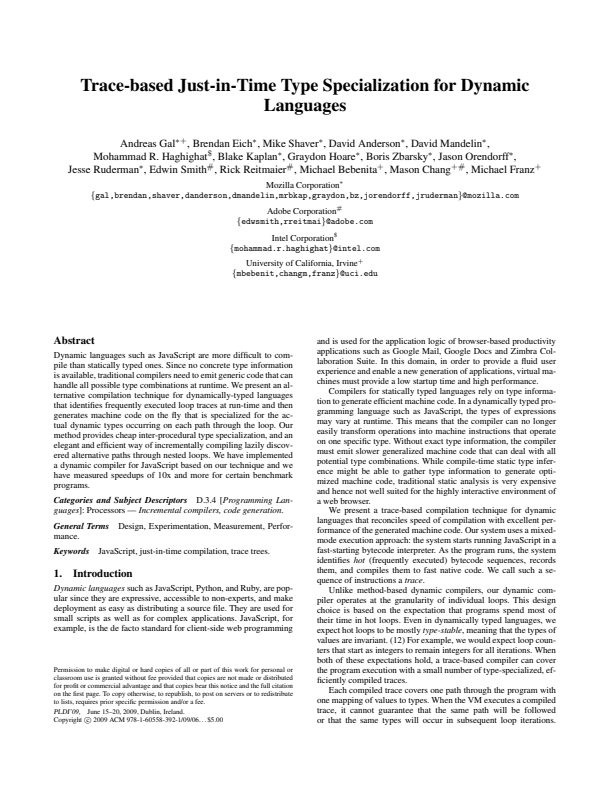

BT
/F41 17.9328 Tf 80.5159 700.6706 Td[(T)74(race-based)-250(J)15(ust-in-T)18(ime)-250(T)74(ype)-250(Specialization)-250(f)25(or)-250(Dynamic)]TJ 183.1901 -19.9253 Td[(Languages)]TJ/F42 10.9589 Tf -143.3836 -35.8655 Td[(Andreas)-250(Gal)]TJ/F26 7.9701 Tf 55.0789 3.9588 Td[(\003)]TJ/F22 7.9701 Tf 4.7323 0 Td[(+)]TJ/F42 10.9589 Tf 7.0846 -3.9588 Td[(,)-250(Brendan)-250(Eich)]TJ/F26 7.9701 Tf 65.4351 3.9588 Td[(\003)]TJ/F42 10.9589 Tf 4.7323 -3.9588 Td[(,)-250(Mik)10(e)-250(Sha)20(v)15(er)]TJ/F26 7.9701 Tf 61.2928 3.9588 Td[(\003)]TJ/F42 10.9589 Tf 4.7323 -3.9588 Td[(,)-250(Da)20(vid)-250(Anderson)]TJ/F26 7.9701 Tf 77.3913 3.9588 Td[(\003)]TJ/F42 10.9589 Tf 4.7323 -3.9588 Td[(,)-250(Da)20(vid)-250(Mandelin)]TJ/F26 7.9701 Tf 76.7884 3.9588 Td[(\003)]TJ/F42 10.9589 Tf 4.7323 -3.9588 Td[(,)]TJ -393.5134 -12.9514 Td[(Mohammad)-250(R.)-250(Haghighat)]TJ/F22 7.9701 Tf 114.147 3.9588 Td[($)]TJ/F42 10.9589 Tf 4.7323 -3.9588 Td[(,)-250(Blak)10(e)-250(Kaplan)]TJ/F26 7.9701 Tf 65.3254 3.9588 Td[(\00

In [15]:
{
    using var doc = PdfDocument.Open(GetPdf("tracemonkey.pdf"));

    var pg = doc.Pages[0];
    display(pg);

    display(pg.DumpDecodedContents());

}


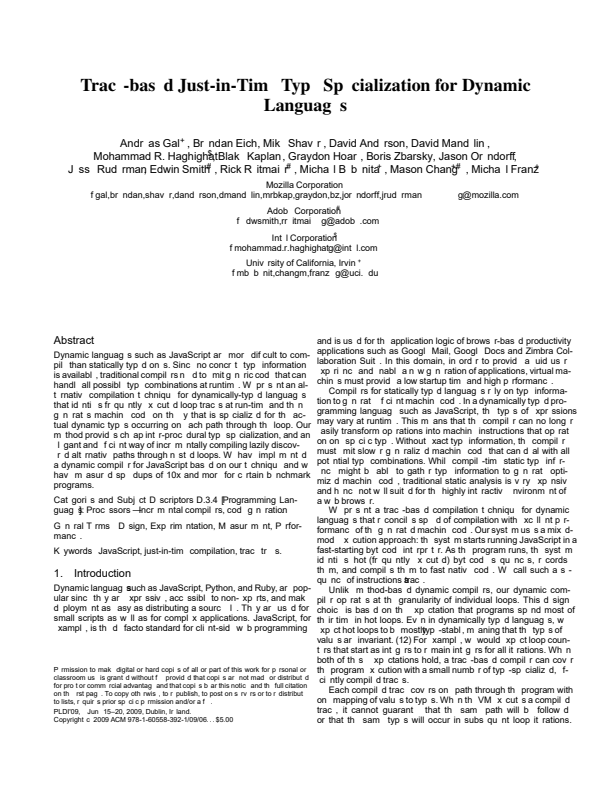

BT
/F41 17.9328 Tf 80.5159 700.6706 Td[(T) 74 (rac) -419.5186495780945 (-bas) -466.44923090934753 (d) -250 (J) 15 (ust-in-T) 18 (im) -457.89140462875366 -250 (T) 74 (yp) -467.55704283714294 -250 (Sp) -473.08915853500366 (cialization) -250 (f) 25 (or) -250 (Dynamic) ]TJ
183.1901 -19.9253 Td[(Languag) -481.2445640563965 (s) ]TJ
F42 10.9589 Tf -143.3836 -35.8655 Td[(Andr) -474.0162491798401 (as) -250 (Gal) ]TJ
F26 7.9701 Tf 55.0789 3.9588 Td[(\003)]TJ/
F22 7.9701 Tf 4.7323 0 Td[(+)]TJ/
F42 10.9589 Tf 7.0846 -3.9588 Td[(,) -250 (Br) -445.0925588607788 (ndan) -250 (Eich) ]TJ
F26 7.9701 Tf 65.4351 3.9588 Td[(\003)]TJ/
F42 10.9589 Tf 4.7323 -3.9588 Td[(,) -250 (Mik) 10 -487.9527688026428 -250 (Sha) 20 (v) 15 -408.21927785873413 (r) ]TJ
F26 7.9701 Tf 61.2928 3.9588 Td[(\003)]TJ/
F42 10.9589 Tf 4.7323 -3.9588 Td[(,) -250 (Da) 20 (vid) -250 (And) -442.899227142334 (rson) ]TJ
F26 7.9701 Tf 77.3913 3.9588 Td[(\003)]TJ/
F42 10.9589 Tf 4.7323 -3.9588 Td[(,) -250 (Da) 20 (vid) -250 (Mand) -402.210921

In [16]:
{
using var doc = PdfDocument.Open(GetPdf("tracemonkey.pdf"));

var pg = doc.Pages[0];


void Redact() // wrap in function due to polyglot notebook / ref struct
{
    var redaction = new SinglePassRedactor(pg, true); // randomize spacing to prevent reconstruction attempts in non monospace fonts
    pg = redaction.RedactContent(c => c.Char == 'e');
}

Redact();

// display(pg);
display(pg.DumpDecodedContents());
}